In [1]:
#Creating a random NxN matrix with random integers using python
import time
#Creating lists for the size/time plot
timing_python = [] 
timing_numpy = []
list_of_N = []
import operator
import itertools
from random import randint
import numpy as np
for a in range(1, 101):  #100 trials of N to collect enough timing data
    #Creating a random NxN matrix
    N = randint(1, 1000)
    print(N)
    list_of_N.append(N)
    matrix1 = np.random.rand(N, N)
    matrix2 = np.random.rand(N, N)

    #Pure python implementation of matrix multiplication
    start_time = time.time()
    def matmult(a,b):
        zip_b = zip(*b)
        zip_b = list(zip_b)
        return [[sum(ele_a*ele_b for ele_a, ele_b in zip(row_a, col_b)) 
                 for col_b in zip_b] for row_a in a]
    mult_product = matmult(matrix1, matrix2)
    end_time = time.time()
    timing_python.append(end_time - start_time)
    print("Part 1 complete") #Debug
    #Numpy implementation of matrix multiplication
    start_time_2 = time.time()
    mult_product_2 = np.dot(matrix1, matrix2)
    end_time_2 = time.time()
    timing_numpy.append(end_time_2 - start_time_2)
    print("Test #", a, "Completed") #Just for record/debug purposes


150
Part 1 complete
Test # 1 Completed
296
Part 1 complete
Test # 2 Completed
946
Part 1 complete
Test # 3 Completed
484
Part 1 complete
Test # 4 Completed
933
Part 1 complete
Test # 5 Completed
956
Part 1 complete
Test # 6 Completed
82
Part 1 complete
Test # 7 Completed
176
Part 1 complete
Test # 8 Completed
106
Part 1 complete
Test # 9 Completed
234
Part 1 complete
Test # 10 Completed
325
Part 1 complete
Test # 11 Completed
499
Part 1 complete
Test # 12 Completed
215
Part 1 complete
Test # 13 Completed
158
Part 1 complete
Test # 14 Completed
897
Part 1 complete
Test # 15 Completed
331
Part 1 complete
Test # 16 Completed
198
Part 1 complete
Test # 17 Completed
326
Part 1 complete
Test # 18 Completed
992
Part 1 complete
Test # 19 Completed
157
Part 1 complete
Test # 20 Completed
899
Part 1 complete
Test # 21 Completed
820
Part 1 complete
Test # 22 Completed
513
Part 1 complete
Test # 23 Completed
883
Part 1 complete
Test # 24 Completed
414
Part 1 complete
Test # 25 Completed
500
Part 1

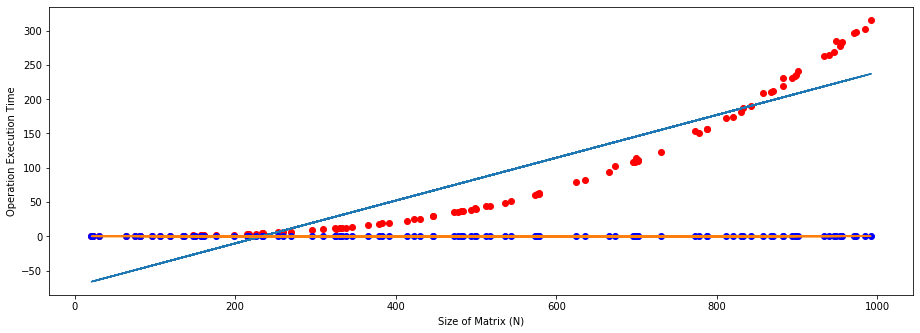

In [9]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax=fig.add_axes([0, 0, 2, 1])
ax.scatter(list_of_N, timing_python, color = 'r')
ax.scatter(list_of_N, timing_numpy, color = 'b')

def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)
    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    b = numer / denum
    a = ybar - b * xbar
    return a, b

a, b = best_fit(list_of_N, timing_python)
c, d = best_fit(list_of_N, timing_numpy)

yfit = [a + b * xi for xi in list_of_N]
yfit2 = [c + d * xi for xi in list_of_N]
plt.plot(list_of_N, yfit,
         list_of_N, yfit2)
plt.xlabel("Size of Matrix (N)")
plt.ylabel("Operation Execution Time")
plt.savefig("size_vs_time_2.png")